In [1]:
import numpy as np
import matplotlib.pyplot as plt
from muscleups import muscleups
from cosmo import cosmo
%matplotlib inline

In [2]:
ng = 256
boxsize = 300.

twolpt = muscleups(scheme='2lpt',z_pk=50,boxsize=boxsize,ng=ng,redshift=0.,return_pos=True)
pos2lpt = twolpt.generate()

msc = muscleups(scheme='muscle',z_pk=50,boxsize=boxsize,ng=ng,redshift=0,return_pos=True)
posmuscle = msc.generate()

zeld = muscleups(scheme='zeld',z_pk=50,boxsize=boxsize,ng=ng,redshift=0,return_pos=True)
poszeld = zeld.generate()

alpt = muscleups(smallscheme='sc',sigmaalpt=4.0,z_pk=50,boxsize=boxsize,ng=ng,redshift=0,return_pos=True)
posalpt = alpt.generate()

mup = muscleups(scheme='muscleups',sigmaalpt=4.0,z_pk=50,boxsize=boxsize,ng=ng,redshift=0,return_pos=True)
posmup = mup.generate()

parsing the parameters
using 2lpt
creating the folder  /home/federico/Documenti/PhD/LSS/MUSCLEUPS/sims/
creating the folder  /home/federico/Documenti/PhD/LSS/MUSCLEUPS/sims/bx300.0_ng256_z0.0_Om0.30/
creating the folder  /home/federico/Documenti/PhD/LSS/MUSCLEUPS/sims/bx300.0_ng256_z0.0_Om0.30/2lpt/
written binaries in /home/federico/Documenti/PhD/LSS/MUSCLEUPS/sims/bx300.0_ng256_z0.0_Om0.30/2lpt/z0.0__0.dat
parsing the parameters
using muscle
creating the folder  /home/federico/Documenti/PhD/LSS/MUSCLEUPS/sims/bx300.0_ng256_z0.0_Om0.30/muscle/
written binaries in /home/federico/Documenti/PhD/LSS/MUSCLEUPS/sims/bx300.0_ng256_z0.0_Om0.30/muscle/z0.0__0.dat
parsing the parameters
using Zel'dovich approximation
creating the folder  /home/federico/Documenti/PhD/LSS/MUSCLEUPS/sims/bx300.0_ng256_z0.0_Om0.30/zeld/
written binaries in /home/federico/Documenti/PhD/LSS/MUSCLEUPS/sims/bx300.0_ng256_z0.0_Om0.30/zeld/z0.0__0.dat
parsing the parameters
implementing alpt with sc
sigma of alpt:  4.0
c

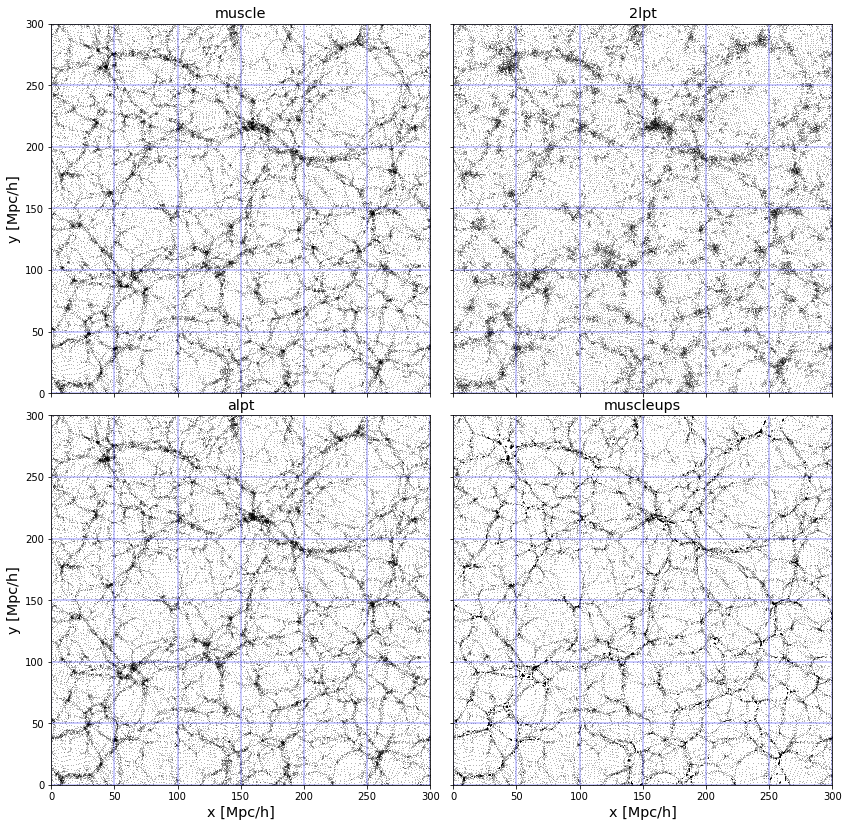

In [3]:
fig,ax = plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True,figsize=(7*2,7*2),gridspec_kw={'wspace':0.06,'hspace':0.06})

ax.flat[0].set_ylabel('y [Mpc/h]',fontsize='x-large')
ax.flat[0].scatter(posmuscle[0][:,:,ng//2].flatten(),posmuscle[1][:,:,ng//2].flatten(),s=.2,lw=0.,color='black')
ax.flat[0].grid(color='blue', linestyle='-', linewidth=0.4)
ax.flat[0].set_xlim([0,boxsize])
ax.flat[0].set_ylim([0,boxsize])
ax.flat[0].set_title('muscle',fontsize='x-large')

ax.flat[1].scatter(pos2lpt[0][:,:,ng//2].flatten(),pos2lpt[1][:,:,ng//2].flatten(),s=.2,lw=0.,color='black')
ax.flat[1].grid(color='blue', linestyle='-', linewidth=0.4)
ax.flat[1].set_xlim([0,boxsize])
ax.flat[1].set_ylim([0,boxsize])
ax.flat[1].set_title('2lpt',fontsize='x-large')

ax.flat[2].set_ylabel('y [Mpc/h]',fontsize='x-large')
ax.flat[2].set_xlabel('x [Mpc/h]',fontsize='x-large')
ax.flat[2].scatter(posalpt[0][:,:,ng//2].flatten(),posalpt[1][:,:,ng//2].flatten(),s=.2,lw=0.,color='black')
ax.flat[2].grid(color='blue', linestyle='-', linewidth=0.4)
ax.flat[2].set_xlim([0,boxsize])
ax.flat[2].set_ylim([0,boxsize])
ax.flat[2].set_title('alpt',fontsize='x-large')

#ax.flat[3].scatter(poszeld[0][:,:,ng//2].flatten(),poszeld[1][:,:,ng//2].flatten(),s=.2,lw=0.,color='black')
#ax.flat[3].grid(color='blue', linestyle='-', linewidth=0.4)
#ax.flat[3].set_xlim([0,boxsize])
#ax.flat[3].set_ylim([0,boxsize])
#ax.flat[3].set_title('zeld',fontsize='x-large')

ax.flat[3].set_xlabel('x [Mpc/h]',fontsize='x-large')
ax.flat[3].scatter(posmup[0][:,:,ng//2].flatten(),posmup[1][:,:,ng//2].flatten(),s=.2,lw=0.,color='black')
ax.flat[3].grid(color='blue', linestyle='-', linewidth=0.4)
ax.flat[3].set_xlim([0,boxsize])
ax.flat[3].set_ylim([0,boxsize])
ax.flat[3].set_title('muscleups',fontsize='x-large')

plt.savefig('images/pos.png', dpi=150,facecolor='white')

plt.show()

we can also save the positions in a Gadget format binaries by setting return_pos to False

In [4]:
from utils.make_statistics import MAS, fastPk

In [7]:
# density fields
d2lpt = MAS(pos2lpt,boxsize,ng)
dalpt = MAS(posalpt,boxsize,ng)
dzeld = MAS(poszeld,boxsize,ng)
dmuscle = MAS(posmuscle,boxsize,ng)
dmup = MAS(posmup,boxsize,ng)

compute power spectrum

In [8]:
# power spectra
kbins, pk2lpt = fastPk(d=d2lpt,boxsize=boxsize,kb=1)
pkzeld = fastPk(d=dzeld,boxsize=boxsize)
pkalpt = fastPk(d=dalpt,boxsize=boxsize)
pkmuscle = fastPk(d=dmuscle,boxsize=boxsize)
pkmup = fastPk(d=dmup,boxsize=boxsize)

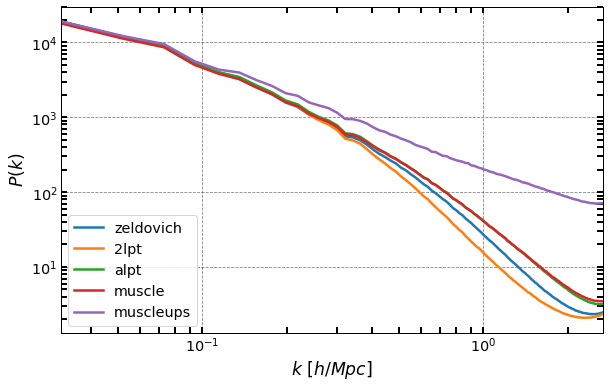

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(6*1.62,6))

ax.grid(ls='--')
ax.tick_params(direction='in', length=6, width=2, colors='k', grid_color='k',
                          grid_alpha=0.5, labelsize='x-large', which='both', top=True, right=True)
ax.set_xlim([kbins[0], kbins[-1]])
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('1')
#ax.set_ylim([0.75, 1.05])

ax.set_xlabel('$k \\ [h/Mpc]$', fontsize='xx-large')
ax.set_ylabel('$P(k)$', fontsize='xx-large')

ax.loglog(kbins, pkzeld, lw=2.5, label='zeldovich')
ax.loglog(kbins, pk2lpt, lw=2.5, label='2lpt')
ax.loglog(kbins, pkalpt, lw=2.5, label='alpt')
ax.loglog(kbins, pkmuscle, lw=2.5, label='muscle')
ax.loglog(kbins, pkmup, lw=2.5, label='muscleups')

ax.legend(fontsize='x-large',loc='lower left')
plt.savefig('images/pk.png', dpi=150,facecolor='white')

plt.show()

In [10]:
# initial density extrapolated to today
dini = np.fft.irfftn(twolpt.dk()) * twolpt.growth

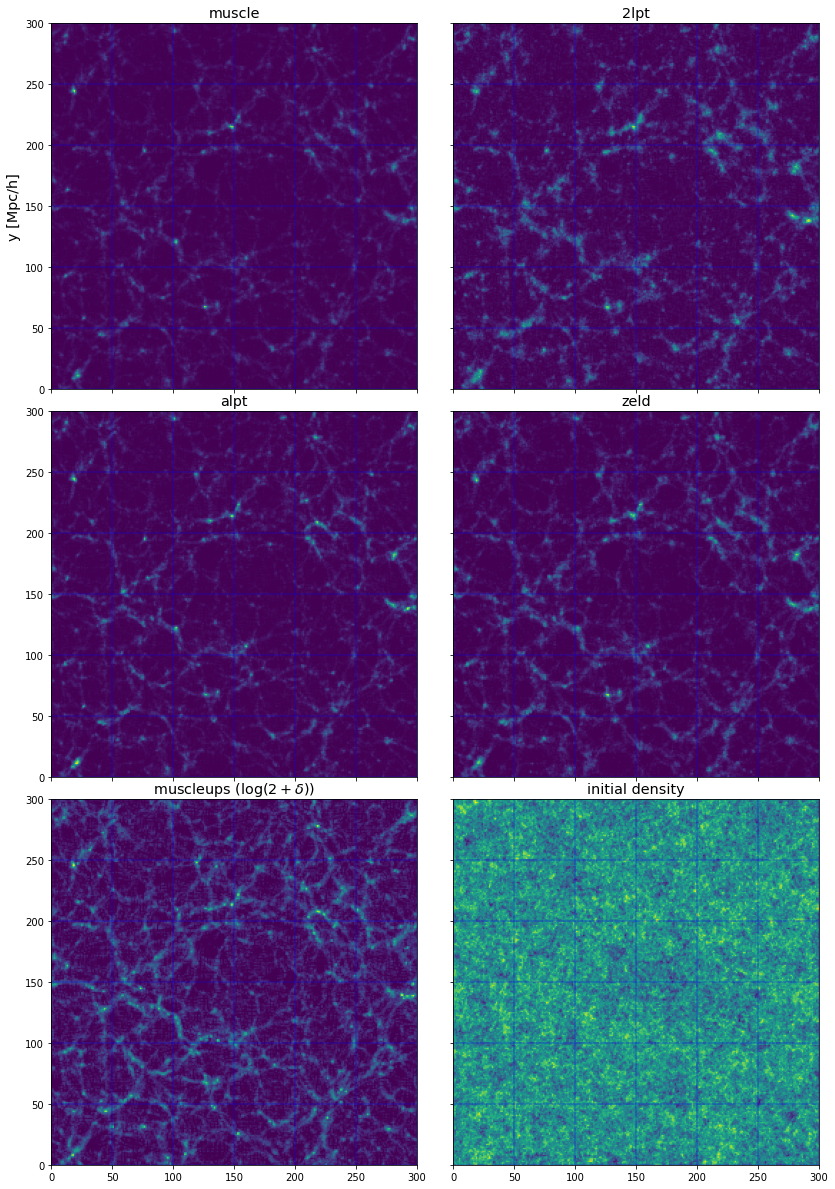

In [11]:
fig,ax = plt.subplots(nrows=3,ncols=2,sharex=True,sharey=True,figsize=(7*2,7*3),gridspec_kw={'wspace':0.06,'hspace':0.06})

extent = 0., boxsize, 0., boxsize

ax.flat[0].set_ylabel('y [Mpc/h]',fontsize='x-large')
ax.flat[0].imshow(dmuscle[ng//4], extent=extent)
ax.flat[0].grid(color='blue', linestyle='-', linewidth=0.4)
ax.flat[0].set_xlim([0,boxsize])
ax.flat[0].set_ylim([0,boxsize])
ax.flat[0].set_title('muscle',fontsize='x-large')

ax.flat[1].imshow(d2lpt[ng//4], extent=extent)
ax.flat[1].grid(color='blue', linestyle='-', linewidth=0.4)
ax.flat[1].set_xlim([0,boxsize])
ax.flat[1].set_ylim([0,boxsize])
ax.flat[1].set_title('2lpt',fontsize='x-large')

ax.flat[2].imshow(dalpt[ng//4], extent=extent)
ax.flat[2].grid(color='blue', linestyle='-', linewidth=0.4)
ax.flat[2].set_xlim([0,boxsize])
ax.flat[2].set_ylim([0,boxsize])
ax.flat[2].set_title('alpt',fontsize='x-large')

ax.flat[3].imshow(dzeld[ng//4], extent=extent)
ax.flat[3].grid(color='blue', linestyle='-', linewidth=0.4)
ax.flat[3].set_xlim([0,boxsize])
ax.flat[3].set_ylim([0,boxsize])
ax.flat[3].set_title('zeld',fontsize='x-large')

ax.flat[4].imshow(np.log1p(dmup+1.0)[ng//4], extent=extent)
ax.flat[4].grid(color='blue', linestyle='-', linewidth=0.4)
ax.flat[4].set_xlim([0,boxsize])
ax.flat[4].set_ylim([0,boxsize])
ax.flat[4].set_title('muscleups ($\log{(2+\delta)}$)',fontsize='x-large')

ax.flat[5].imshow(dini[ng//4], extent=extent)
ax.flat[5].grid(color='blue', linestyle='-', linewidth=0.4)
ax.flat[5].set_xlim([0,boxsize])
ax.flat[5].set_ylim([0,boxsize])
ax.flat[5].set_title('initial density',fontsize='x-large')

plt.show()